In [152]:
import re
from pathlib import Path

from tensorboard.backend.event_processing import event_accumulator
import pandas as pd


baseline_avgs = {
    'ucf101': 73.85,
    'eurosat': 60.03,
    'oxford_flowers': 74.83,
    'dtd': 56.37,
    'fgvc_aircraft': 31.09,
    'caltech101': 95.40,
    'oxford_pets': 94.12,
    'stanford_cars': 68.65,
    'food101': 90.66,
    'sun397': 72.23,
    'imagenet': 70.22,
}

losses = dict()

from matplotlib import pyplot as plt

def analy(ds):
    def parse_tensorboard(path, scalars):
        """returns a dictionary of pandas dataframes for each requested scalar"""
        ea = event_accumulator.EventAccumulator(
            path,
            size_guidance={event_accumulator.SCALARS: 0},
        )
        _absorb_print = ea.Reload()
        # make sure the scalars are in the event accumulator tags
        assert all(
            s in ea.Tags()["scalars"] for s in scalars
        ), "some scalars were not found in the event accumulator"
        return {k: pd.DataFrame(ea.Scalars(k)) for k in scalars}

    # all dirs like data/fomo/output/CoPrompt_
    dirs = list(Path('data/fomo/output').glob('CoPrompt_*'))
    rs = []
    rsa = []
    for dir in dirs:
        seed1_train = dir / f'train_base/{ds}/shots_16/CoPrompt/coprompt/seed1/'
        tensorboard = seed1_train / 'tensorboard'
        clog = seed1_train / 'clog.txt'
        
        if not clog.exists():
            continue
            
        with open(clog, 'r') as f:
            lines = f.readlines()
            if len(lines) < 2:
                continue
            p = lines[-1][4:-5]
        
        # read from tensorboard)
        try:
            df = parse_tensorboard(tensorboard, ['test/accuracy'])
            test_acc = df['test/accuracy'].iloc[-1]['value']
        except Exception as e:
            continue
            
        rs.append((test_acc, p, str(dir)))
        
        seed1_test = dir / f'test_new/{ds}/shots_16/CoPrompt/seed1/'
        out = seed1_test / 'output.log'
# => result
# * total: 1,410
# * correct: 1,070
# * accuracy: 75.9%
# * error: 24.1%
# * macro_f1: 70.8%
        
        try:
            # use regex to match format above
            acc = re.search(r'accuracy: ([0-9.]+)%', out.read_text()).group(1)
            acc = float(acc)
            rsa.append((test_acc, p, acc, str(dir)))
        except Exception as e:
            pass
        
        
        
        
    print(len(rs), len(rsa))
    # for test_acc, p, m in list(sorted(rs, reverse=True))[:5]:
    #     print(f"[{test_acc}], {p}")
    #     print(m)
    # 
    print('---')
        # 
    #%%
    best = list(sorted(rsa, reverse=True, key=lambda x:  x[0] + x[2]))[0]
    best_dir = best[3]
    best_avg = (best[0] + best[2]) / 2
    seed1_train = Path(best_dir) / f'train_base/{ds}/shots_16/CoPrompt/coprompt/seed1/'
    tensorboard = seed1_train / 'tensorboard'
    df = parse_tensorboard(tensorboard, ['train/loss'])
    
    losses[ds] = df['train/loss']['value']
    
    
    for test_acc, p, acc, m in list(sorted(rsa, reverse=True, key=lambda x:  x[0] + x[2]))[:10]:
        avg = (test_acc + acc) / 2
        baseline_avg = baseline_avgs[ds]
        print(f"[{test_acc}], [{acc}], ({best_avg-avg}) [{avg-baseline_avg}] {p}")
        print(m)

    
    plt.plot(df['train/loss']['step'], df['train/loss']['value'])
    
    
        

123 47
---
[75.64633178710938], [78.0], (0.0) [2.973165893554693] inspirational  
data/fomo/output/CoPrompt_m0.9_wstd0.012_nctxt1_maxepoch16
[77.86969757080078], [75.2], (0.28831710815430256) [2.6848487854003906] casually whidoing  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt3_maxepoch16
[76.68045806884766], [75.9], (0.5329368591308565) [2.4402290344238367] jing altman attempting  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt3_maxepoch16
[76.9389877319336], [74.7], (1.0036720275878963) [1.9694938659667969] casually trying doing  
data/fomo/output/CoPrompt_m0.9_wstd0.012_nctxt3_maxepoch16
[76.78386688232422], [74.6], (1.131232452392581) [1.8419334411621122] awesome instructional  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt2_maxepoch16
[76.05998229980469], [75.3], (1.143174743652338) [1.8299911499023551] patricia kiefer doing  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt3_maxepoch16
[72.85418701171875], [77.9], (1.4460723876953097) [1.5270935058593835] casually daredevil  
da

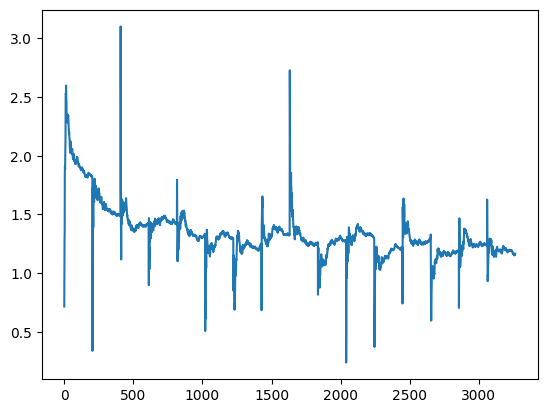

In [153]:
analy('ucf101')

48 48
---
[89.21428680419922], [79.9], (0.0) [24.52714340209961] increased underdog gihc  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt4_maxepoch16
[89.54762268066406], [75.5], (2.033332061767581) [22.49381134033203] organic career ativesized  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt4_maxepoch16
[77.83333587646484], [80.6], (5.340475463867193) [19.186667938232418] # canadiens  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt2_maxepoch16
[80.33333587646484], [76.3], (6.240475463867185) [18.286667938232426] taco lue novascotia  
data/fomo/output/CoPrompt_m0.0_wstd0.08_nctxt3_maxepoch8
[74.88095092773438], [81.3], (6.466667938232419) [18.060475463867192] raqmmon  
data/fomo/output/CoPrompt_m0.0_wstd0.08_nctxt2_maxepoch16
[83.02381134033203], [68.3], (8.895237731933591) [15.63190567016602] drumming  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt1_maxepoch16
[86.64286041259766], [64.2], (9.13571319580079) [15.391430206298821] coronado rugnovascotia  
data/fomo/output/CoPrompt_m0.0_

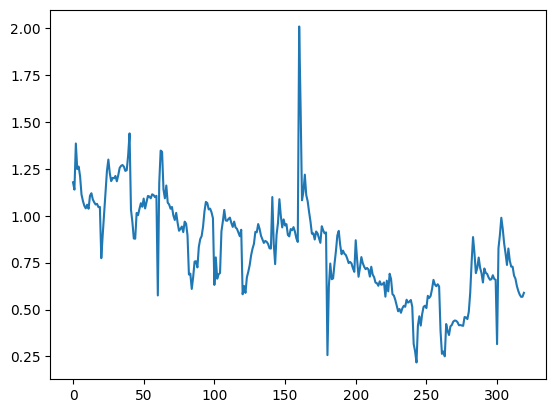

In [154]:
analy('eurosat')

48 48
---
[74.54890441894531], [78.3], (0.0) [1.5944522094726636] flowering flower  
data/fomo/output/CoPrompt_m0.9_wstd0.08_nctxt2_maxepoch16
[75.68850708007812], [76.0], (0.5801986694335994) [1.0142535400390642] flower  
data/fomo/output/CoPrompt_m0.9_wstd0.012_nctxt1_maxepoch16
[75.30863952636719], [76.3], (0.6201324462890625) [0.9743197631836011] flowering  
data/fomo/output/CoPrompt_m0.9_wstd0.012_nctxt1_maxepoch8
[75.59354400634766], [75.9], (0.677680206298831) [0.9167720031738327] perennial wonderful scented :-  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt4_maxepoch8
[75.40361022949219], [75.7], (0.8726470947265739) [0.7218051147460898] pollinators  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt1_maxepoch16
[73.40930938720703], [77.4], (1.0197975158691435) [0.5746546936035202] hybrid plant flower –  
data/fomo/output/CoPrompt_m0.9_wstd0.08_nctxt4_maxepoch16
[76.73314666748047], [74.0], (1.0578788757324276) [0.5365733337402361] flowerflowering wonderful  
data/fomo/output/CoP

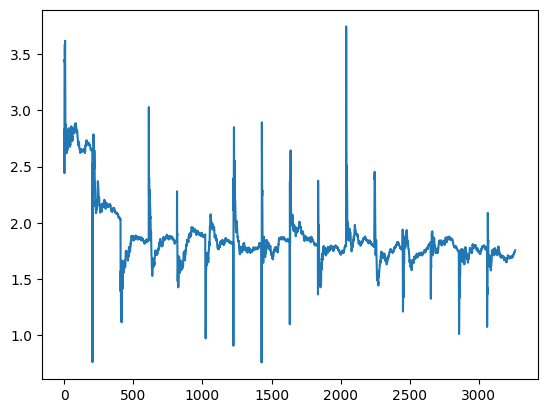

In [155]:
analy('oxford_flowers')

47 47
---
[62.96296310424805], [62.8], (0.0) [6.511481552124025] beautiful abstract  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt2_maxepoch16
[62.03703689575195], [61.8], (0.9629631042480469) [5.548518447875978] cropped  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt1_maxepoch16
[63.657405853271484], [58.9], (1.602778625488277) [4.908702926635748] beautiful abstract  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt2_maxepoch16
[62.38425827026367], [59.3], (2.0393524169921875) [4.472129135131837] textures abstract  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt2_maxepoch16
[58.33333206176758], [62.8], (2.3148155212402344) [4.19666603088379] deeply ically exploring  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt3_maxepoch8
[61.689815521240234], [59.1], (2.4865737915039077) [4.024907760620117] suitable  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt1_maxepoch16
[59.83796310424805], [60.3], (2.8125) [3.6989815521240246] beautiful landscape  
data/fomo/output/CoPrompt_m0.0_wstd0.012_n

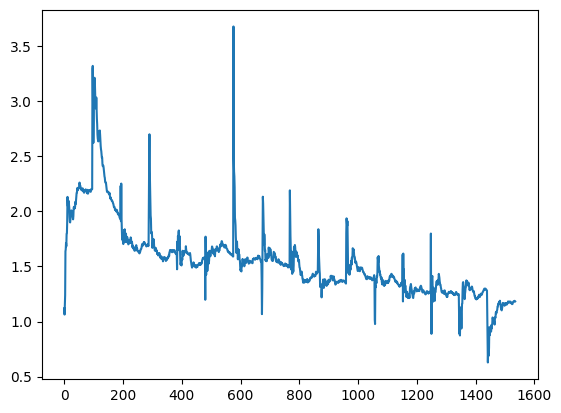

In [156]:
analy('dtd') # 

44 44
---
[32.953182220458984], [35.9], (0.0) [3.336591110229495] axiairline ...!! powerful  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt4_maxepoch16
[30.912364959716797], [36.1], (0.9204086303710994) [2.4161824798583957] laminsuperb  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt2_maxepoch8
[31.032413482666016], [35.8], (1.0103843688964886) [2.3262067413330065] westspecial aviation good  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt4_maxepoch16
[31.21248435974121], [35.5], (1.0703489303588896) [2.2662421798706056] airjaguar  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt2_maxepoch16
[30.792316436767578], [35.2], (1.4304328918457045) [1.9061582183837906] finance aviation  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt2_maxepoch16
[31.27250862121582], [34.4], (1.590336799621582) [1.7462543106079131] alvairline  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt2_maxepoch16
[29.6518611907959], [35.9], (1.650660514831543) [1.6859305953979522] analfalcon  
data/fomo/output/CoPrompt_m0

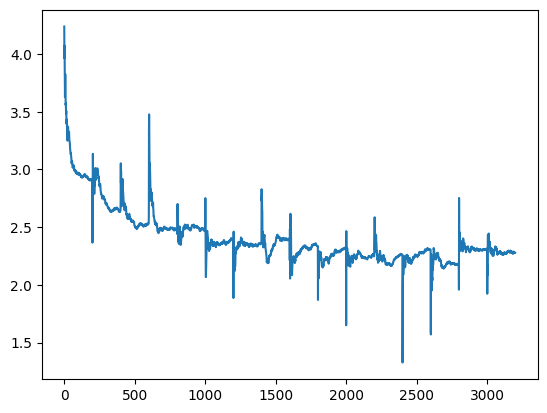

In [157]:
analy('fgvc_aircraft') # 

46 46
---
[97.80503845214844], [95.3], (0.0) [1.1525192260742188] assuming  
data/fomo/output/CoPrompt_m0.9_wstd0.08_nctxt1_maxepoch8
[97.80503845214844], [95.1], (0.10000000000000853) [1.0525192260742102] davis  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt1_maxepoch16
[97.28857421875], [95.5], (0.15823211669922443) [0.9942871093749943] icattractive interesting sized  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt4_maxepoch8
[97.67591857910156], [95.1], (0.16455993652344603) [0.9879592895507727] webster classification  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt2_maxepoch16
[97.54680633544922], [95.2], (0.17911605834962074) [0.973403167724598] picture depicted  
data/fomo/output/CoPrompt_m0.9_wstd0.012_nctxt2_maxepoch8
[98.25694274902344], [94.4], (0.22404785156250284) [0.9284713745117159] mathematical description  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt2_maxepoch8
[98.1923828125], [94.4], (0.2563278198242216) [0.8961914062499972] depicted  
data/fomo/output/CoPrompt_m0

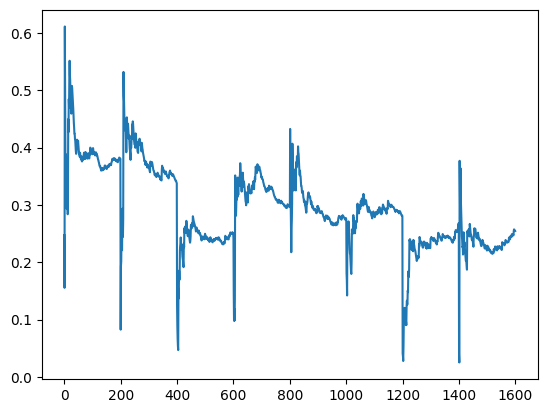

In [158]:
analy('caltech101') # 

48 48
---
[95.1089859008789], [98.2], (0.0) [2.534492950439443] catsofinstagram petday !  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt3_maxepoch16
[94.47102355957031], [97.5], (0.6689811706542912) [1.8655117797851517] slowed  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt1_maxepoch16
[94.31153869628906], [97.6], (0.698723602294919) [1.8357693481445239] majestic goblin  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt2_maxepoch16
[94.7368392944336], [96.9], (0.8360733032226477) [1.6984196472167952] relax mol  
data/fomo/output/CoPrompt_m0.9_wstd0.08_nctxt2_maxepoch8
[93.83306884765625], [97.8], (0.8379585266113168) [1.6965344238281261] terribly napping interference  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt3_maxepoch16
[94.31153869628906], [97.3], (0.8487236022949105) [1.6857693481445324] sister  
data/fomo/output/CoPrompt_m0.9_wstd0.012_nctxt1_maxepoch16
[93.88623046875], [97.7], (0.8613777160644531) [1.6731152343749898] besnehandsome  
data/fomo/output/CoPrompt_m0.0_wstd0.001

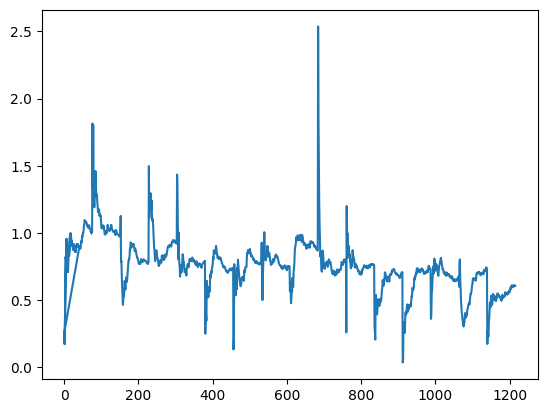

In [159]:
analy('oxford_pets') # 

48 48
---
[64.44277954101562], [74.4], (0.0) [0.7713897705078097] another  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt1_maxepoch16
[64.26786804199219], [73.8], (0.3874557495117159) [0.38393402099609375] wednesday  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt1_maxepoch8
[64.7926025390625], [72.9], (0.5750885009765625) [0.19630126953124716] another  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt1_maxepoch16
[62.9685173034668], [74.0], (0.9371311187744169) [-0.16574134826660725] trail priced versatile authentic  
data/fomo/output/CoPrompt_m0.9_wstd0.012_nctxt4_maxepoch16
[63.91804122924805], [72.8], (1.0623691558837862) [-0.29097938537597656] briefly  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt1_maxepoch8
[64.31784057617188], [72.3], (1.1124694824218722) [-0.3410797119140625] bring special exclusive .  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt4_maxepoch8
[63.74312973022461], [72.7], (1.1998249053955163) [-0.4284351348877067] newer lifestyle brings able  
data/fomo/output

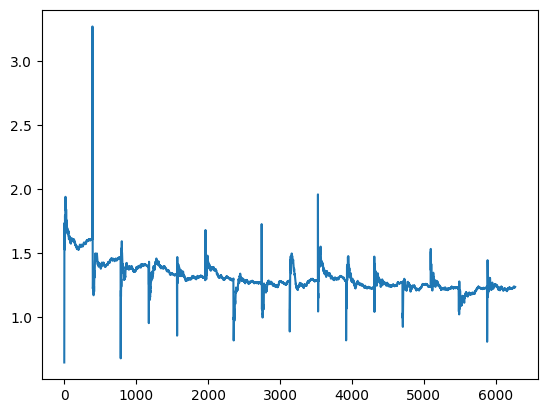

In [160]:
analy('stanford_cars') # 

48 48
---
[90.54901885986328], [90.5], (0.0) [-0.13549057006835596] having luxury equally delish  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt4_maxepoch16
[90.1568603515625], [90.2], (0.3460792541503963) [-0.4815698242187523] craving  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt1_maxepoch16
[90.09803771972656], [90.1], (0.4254905700683622) [-0.5609811401367182] craving  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt1_maxepoch8
[90.03921508789062], [90.0], (0.5049018859863281) [-0.6403924560546841] super 😋  
data/fomo/output/CoPrompt_m0.9_wstd0.012_nctxt2_maxepoch16
[90.0261459350586], [90.0], (0.5114364624023438) [-0.6469270324706997] muchas heaven  
data/fomo/output/CoPrompt_m0.0_wstd0.08_nctxt2_maxepoch16
[89.98693084716797], [90.0], (0.5310440063476562) [-0.6665345764160122] hfss said delish  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt4_maxepoch8
[89.96732330322266], [90.0], (0.5408477783203125) [-0.6763383483886685] finally -  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nc

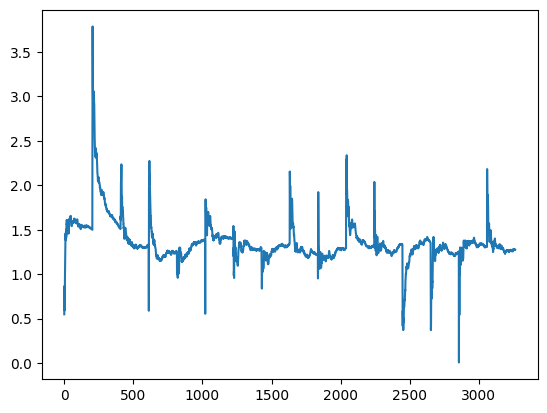

In [161]:
analy('food101') # 

39 32
---
[74.36180877685547], [78.0], (0.0) [3.9509043884277304] picture  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt1_maxepoch16
[74.01004791259766], [78.1], (0.1258804321289091) [3.8250239562988213] apparently  
data/fomo/output/CoPrompt_m0.0_wstd0.001_nctxt1_maxepoch16
[74.16080474853516], [77.7], (0.25050201416016193) [3.7004023742675685] photophotograph  
data/fomo/output/CoPrompt_m0.9_wstd0.001_nctxt2_maxepoch16
[73.94974517822266], [77.8], (0.30603179931640057) [3.64487258911133] these  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt1_maxepoch16
[73.939697265625], [77.8], (0.3110557556152287) [3.6398486328125017] delightful  
data/fomo/output/CoPrompt_m0.0_wstd0.08_nctxt1_maxepoch8
[73.45728302001953], [77.6], (0.6522628784179716) [3.298641510009759] apparently  
data/fomo/output/CoPrompt_m0.9_wstd0.08_nctxt1_maxepoch8
[72.87437438964844], [78.0], (0.7437171936035156) [3.2071871948242148] rence photograph  
data/fomo/output/CoPrompt_m0.0_wstd0.08_nctxt2_maxepoch8
[74.512565

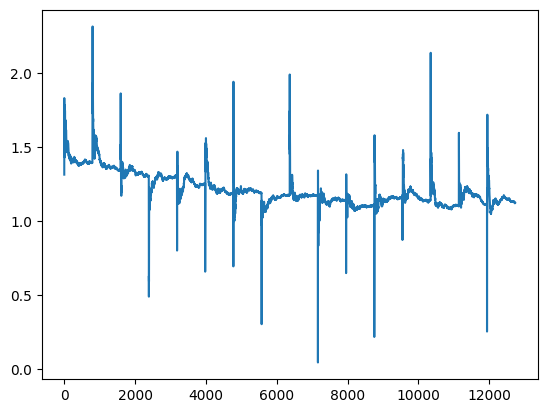

In [162]:
analy('sun397') # \

23 15
---
[73.7760009765625], [70.1], (0.0) [1.7180004882812483] conveniently photograph  
data/fomo/output/CoPrompt_m0.0_wstd0.08_nctxt2_maxepoch32
[73.86399841308594], [69.7], (0.1560012817382841) [1.5619992065429642] behold aforetechnically remarkably active actual (?) a  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt8_maxepoch32
[73.4000015258789], [70.0], (0.23799972534179403) [1.4800007629394543] strangely weird :) a  
data/fomo/output/CoPrompt_m0.0_wstd0.012_nctxt4_maxepoch8
[73.69999694824219], [69.6], (0.28800201416015625) [1.429998474121092] crappy  
data/fomo/output/CoPrompt_m0.0_wstd0.08_nctxt1_maxepoch16
[73.39600372314453], [69.4], (0.5399986267089787) [1.1780018615722696] random picture  
data/fomo/output/CoPrompt_m0.9_wstd0.012_nctxt2_maxepoch16
[73.27200317382812], [69.3], (0.651998901367179) [1.0660015869140693] rubbish  
data/fomo/output/CoPrompt_m0.9_wstd0.08_nctxt1_maxepoch16
[73.55599975585938], [68.8], (0.760000610351554) [0.9579998779296943] photogenic probably

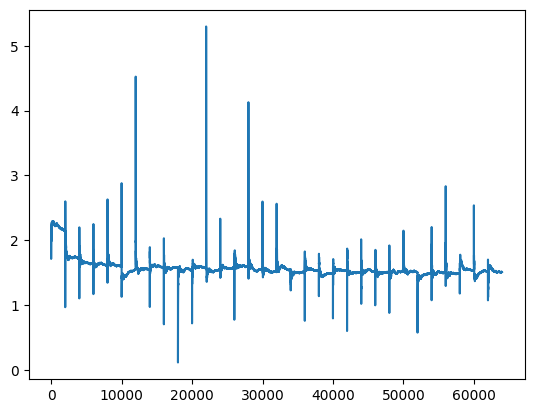

In [163]:
analy('imagenet') # 

In [164]:
for ds, loss in losses.items():
    if len(loss) > 1000:
        steps = range(1000)
        # reduce resolution
        n_actual = len(loss)
        n_desired = 1000
        step_size = n_actual / n_desired
        loss = [loss[int(i * step_size)] for i in steps]
    print(ds, len(loss))
        
    plot = """
    \\begin{tikzpicture}
    \\begin{axis}[
        width=7cm,
        % title={Sparsity across the Network},
        % xlabel={Step},
        % ylabel={Train Loss},
        % xmin=0, xmax=5,
        % ymin=-0.05, ymax=1,
        % xtick=data,
        % ytick={0.0, 0.2,0.4,0.6,0.8,1},
        xticklabel={\pgfmathparse{\\tick}\pgfmathprintnumber{\pgfmathresult}\%},
        legend pos=south east,
        ymajorgrids=true,
        grid style=dashed,
    ]

        % weights
        \\addplot[
            % name path global=middle,
            % only marks,
            color=blue,
            % mark=square,
        ]
        coordinates {
             COORDINATES
        };
    \\end{axis}
    \\end{tikzpicture}
    """.replace('COORDINATES', '\n'.join([f'({x/len(loss)*100}, {y})' for x, y in zip(range(len(loss)), loss)]))
    with open(f'loss_{ds}.tex', 'w') as f:
        f.write(plot)

ucf101 1000
eurosat 320
oxford_flowers 1000
dtd 1000
fgvc_aircraft 1000
caltech101 1000
oxford_pets 1000
stanford_cars 1000
food101 1000
sun397 1000
imagenet 1000


In [165]:
loss_stanford_cars.tex

NameError: name 'loss_stanford_cars' is not defined